## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

%matplotlib inline

## Data Reading and Understanding

In [2]:
pima = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima.shape

(768, 9)

In [5]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
pima.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

There doesn't seem to be a strong relationship between the Pregnancies and Diabetic status. Lets also have a box plot for diabetes.

In [8]:
pima.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [9]:
pima.BMI.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [10]:
pima.SkinThickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

## Data Visualization

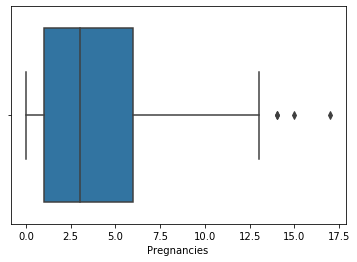

In [11]:
sns.boxplot(pima.Pregnancies)

The Data consists of some females who had more than 10 pregnancies in the past.

![alt text](https://img.buzzfeed.com/buzzfeed-static/static/2017-09/21/19/asset/buzzfeed-prod-fastlane-03/anigif_sub-buzz-4876-1506035360-1.gif)

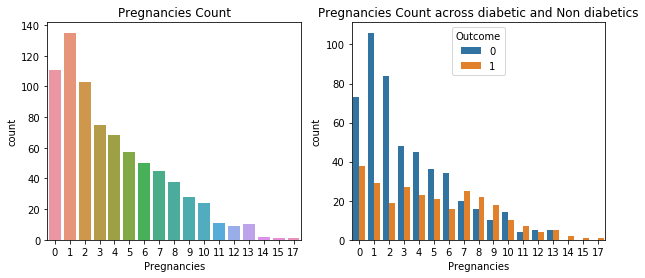

In [12]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.title('Pregnancies Count')
sns.countplot(pima['Pregnancies'])
plt.subplot(1,2,2)
plt.title('Pregnancies Count across diabetic and Non diabetics')
sns.countplot(pima['Pregnancies'], hue = pima['Outcome'])

There does not seem to be any strong relation between number of pregnancies and whether the person has diabetes.

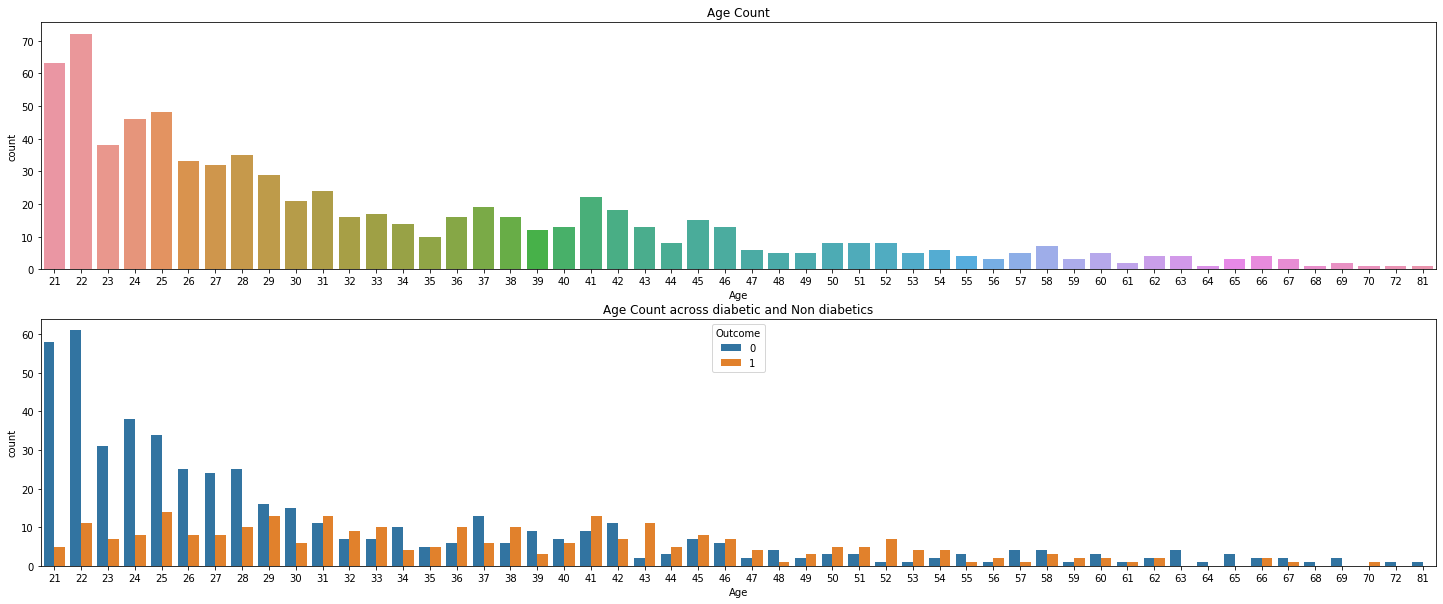

In [13]:
plt.figure(figsize = (25,10))
plt.subplot(2,1,1)
plt.title('Age Count')
sns.countplot(pima.sort_values(by= 'Age').Age)
plt.subplot(2,1,2)
plt.title('Age Count across diabetic and Non diabetics')
sns.countplot(pima.sort_values(by= 'Age').Age, hue = pima['Outcome'])

The data consists of mostly young or middle aged females. And the diabetic patients are mostly middle-aged or older women. 

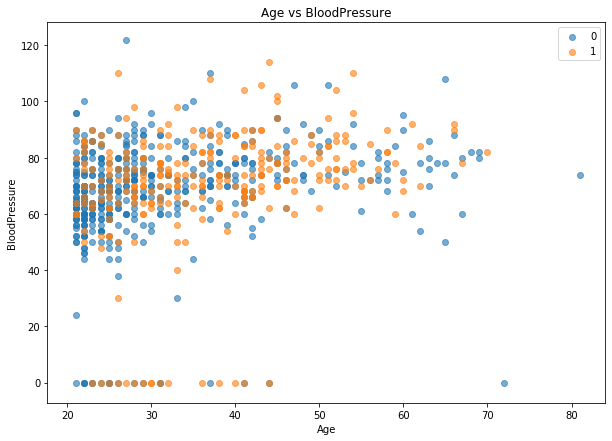

In [14]:
# School Holiday
plt.rcParams['figure.figsize'] = (10,7)
for i in [0,1] :
    data = pima[pima.Outcome == i]
    if(len(data) == 0):
        continue
    plt.scatter(x = data.Age, y = data.BloodPressure, alpha = 0.6, label = i)
plt.title('Age vs BloodPressure')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.legend()

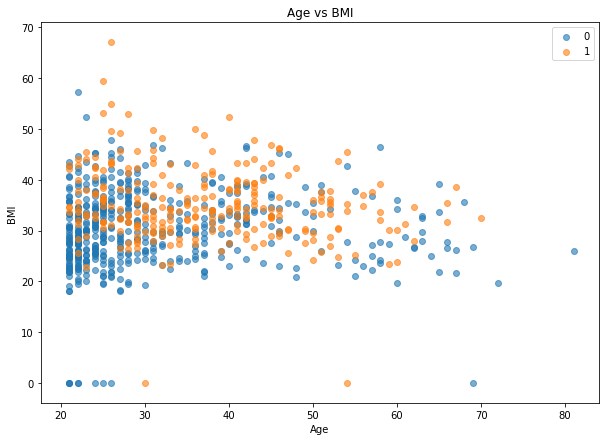

In [15]:
# School Holiday
plt.rcParams['figure.figsize'] = (10,7)
for i in [0,1] :
    data = pima[pima.Outcome == i]
    if(len(data) == 0):
        continue
    plt.scatter(x = data.Age, y = data.BMI, alpha = 0.6, label = i)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()

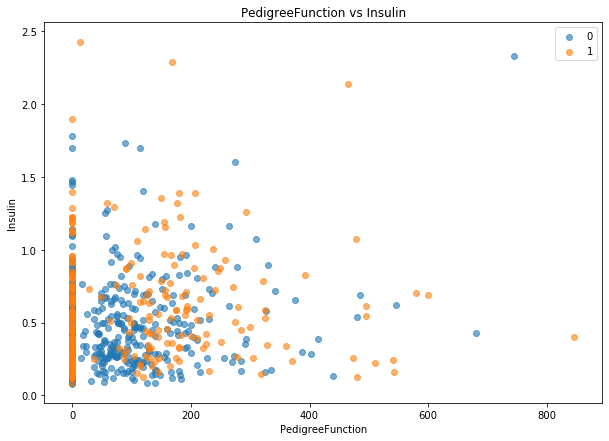

In [16]:
# School Holiday
plt.rcParams['figure.figsize'] = (10,7)
for i in [0,1] :
    data = pima[pima.Outcome == i]
    if(len(data) == 0):
        continue
    plt.scatter(x = data.Insulin, y = data.DiabetesPedigreeFunction, alpha = 0.6, label = i)
plt.title('PedigreeFunction vs Insulin')
plt.xlabel('PedigreeFunction')
plt.ylabel('Insulin')
plt.legend()

Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).

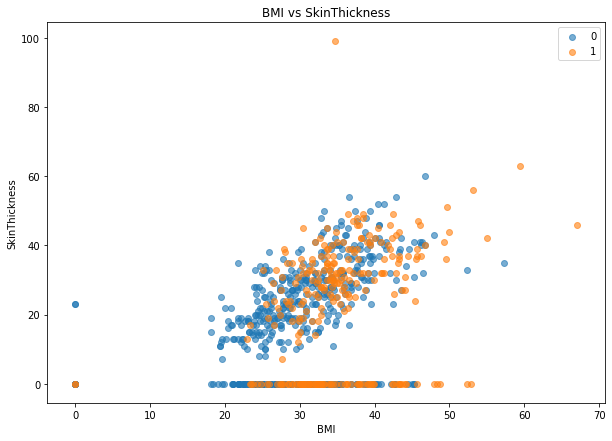

In [17]:
# School Holiday
plt.rcParams['figure.figsize'] = (10,7)
for i in [0,1] :
    data = pima[pima.Outcome == i]
    if(len(data) == 0):
        continue
    plt.scatter(x = data.BMI, y = data.SkinThickness, alpha = 0.6, label = i)
plt.title('BMI vs SkinThickness')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.legend()

More BMI (obesity), more the skin thickness.
Also note for some females, the skin thickness given is zero. We shall fix it soon with Imputation.

Most of the diabetic patiets are 25+.

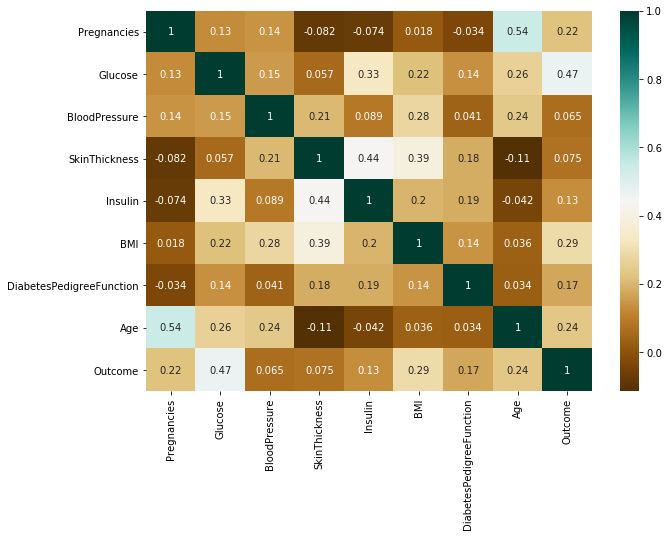

In [18]:
corrmat = pima.corr()
top_corr_feat = corrmat.index
sns.heatmap(pima[top_corr_feat].corr(), annot = True, cmap = 'BrBG')

In [19]:
print('No of entries for Glucose being 0: ',len(pima[pima.Glucose == 0]))
print('No of entries for BloodPressure being 0: ',len(pima[pima.BloodPressure == 0]))
print('No of entries for SkinThickness being 0: ',len(pima[pima.SkinThickness == 0]))
print('No of entries for Insulin being 0: ',len(pima[pima.Insulin == 0]))
print('No of entries for BMI being 0: ',len(pima[pima.BMI == 0]))

No of entries for Glucose being 0:  5
No of entries for BloodPressure being 0:  35
No of entries for SkinThickness being 0:  227
No of entries for Insulin being 0:  374
No of entries for BMI being 0:  11


In [20]:
# Train Test Split
y = pima.pop('Outcome')
X = pima

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

## Data Imputation

In [21]:
from sklearn.impute import SimpleImputer
fillvalues = SimpleImputer(missing_values = 0, strategy = 'mean')

X_train = fillvalues.fit_transform(X_train)
X_test = fillvalues.transform(X_test)

## Model Building and Evaluation

### Random Forest CLassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 100)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [23]:
y_train_predict = random_forest_model.predict(X_train)
y_train_pred = pd.DataFrame({'Diabetes':y_train.values, 'Diabetes_Pred':y_train_predict})

# Let's see the head
y_train_pred.head()

,Diabetes,Diabetes_Pred
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [24]:
# Let's take a look at the confusion matrix again 
confusion = sklearn.metrics.confusion_matrix(y_train_pred.Diabetes, y_train_pred.Diabetes_Pred )
confusion

array([[350,   0],
       [  0, 187]])

Our RandomForest model clearly got overfit on the training data. Lets try out hyperparameter tuning

### Hyperparameter Tuning

In [25]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
rforest = RandomForestClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
forest = GridSearchCV(rforest, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [26]:
# scores of GridSearch CV
scores = forest.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.214805,0.004744,0.010375,0.000075,1,{'max_depth': 1},0.638889,0.675926,0.654206,0.663551,...,0.662963,0.015468,39,0.671329,0.671329,0.660465,0.669767,0.665116,0.667601,0.004233
1,0.216093,0.004087,0.010443,0.000081,2,{'max_depth': 2},0.740741,0.675926,0.757009,0.700935,...,0.720717,0.028927,38,0.780886,0.780886,0.758140,0.788372,0.769767,0.775610,0.010563
2,0.222489,0.003540,0.010679,0.000188,3,{'max_depth': 3},0.787037,0.731481,0.775701,0.747664,...,0.763517,0.020629,37,0.836830,0.827506,0.820930,0.825581,0.827907,0.827751,0.005172
3,0.226567,0.006180,0.010879,0.000460,4,{'max_depth': 4},0.805556,0.750000,0.803738,0.766355,...,0.787747,0.024889,6,0.857809,0.857809,0.853488,0.855814,0.851163,0.855217,0.002577
4,0.229192,0.002094,0.011275,0.000847,5,{'max_depth': 5},0.777778,0.759259,0.803738,0.766355,...,0.778435,0.015479,34,0.883450,0.892774,0.895349,0.888372,0.888372,0.889663,0.004097


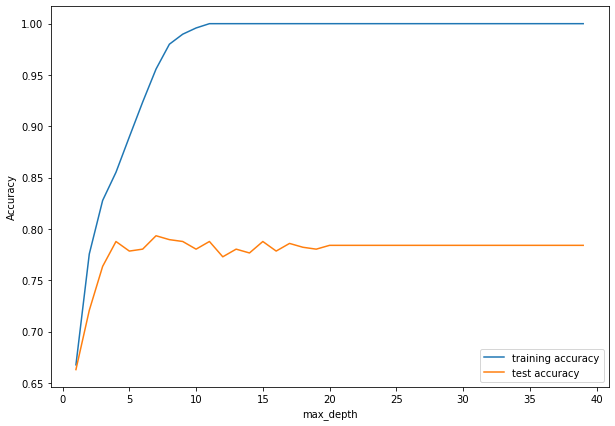

In [27]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
# From above graph, the best max_depth value looks to 7. Lets also make use og the `Model.best_params_` to confirm our finding
forest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [29]:
forest1 = RandomForestClassifier(max_depth = 7, criterion = "gini", 
                               random_state = 100)
forest1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [30]:
y_train_predict = forest1.predict(X_train)
y_train_pred = pd.DataFrame({'Diabetes':y_train.values, 'Diabetes_Pred':y_train_predict})

# Let's see the head
y_train_pred.head()

,Diabetes,Diabetes_Pred
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [31]:
# Let's take a look at the confusion matrix again 
confusion = sklearn.metrics.confusion_matrix(y_train_pred.Diabetes, y_train_pred.Diabetes_Pred )
confusion

array([[337,  13],
       [ 24, 163]])

In [32]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = forest1.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix on test data
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       150
           1       0.61      0.56      0.58        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.72       231

[[121  29]
 [ 36  45]]


In [33]:
# Lets also look at the roc auc. Note that for roc auc, we would need the predicted prob and not the labels.

y_pred_auc = forest1.predict_proba(X_test)
roc = metrics.roc_auc_score(y_test, y_pred_auc[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 78.41%


So here we are getting an accuracy of 71.864%, and roc-auc of 68.11%.

Lets try another model using XGBoost, and see if we get any better reusults.

### XGBoost

In [34]:
from xgboost import XGBClassifier

# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)

# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 78.28%


With all default hyperparameters, we are getting an improved roc auc of 78.28%. Lets try hyperparameter tuning and see if we can get any further better results.

### Hyperparameter Tuning

In [35]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.4, 0.6], 
             'subsample': [0.2, 0.4, 0.6, 0.8]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [36]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimato...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [37]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.032056,0.000140,0.007426,0.006417,0.2,0.2,"{'learning_rate': 0.2, 'subsample': 0.2}",0.817187,0.830438,0.799421,0.815682,0.012707,4,0.965329,0.966146,0.970712,0.967396,0.002369
1,0.035943,0.000451,0.002864,0.000015,0.2,0.4,"{'learning_rate': 0.2, 'subsample': 0.4}",0.830049,0.805762,0.824924,0.820245,0.010453,3,0.990522,0.991451,0.994987,0.992320,0.001924
2,0.037146,0.000190,0.002886,0.000027,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.837438,0.810725,0.821754,0.823306,0.010961,2,0.996554,0.996189,0.998798,0.997180,0.001154
3,0.035921,0.000579,0.002728,0.000122,0.2,0.8,"{'learning_rate': 0.2, 'subsample': 0.8}",0.832649,0.842432,0.834023,0.836368,0.004324,1,0.998070,0.996670,0.998249,0.997663,0.000706
4,0.032561,0.001487,0.002769,0.000174,0.4,0.2,"{'learning_rate': 0.4, 'subsample': 0.2}",0.777778,0.734629,0.755997,0.756135,0.017616,11,0.968535,0.970335,0.977305,0.972058,0.003782
5,0.035630,0.000765,0.002866,0.000019,0.4,0.4,"{'learning_rate': 0.4, 'subsample': 0.4}",0.835112,0.755032,0.799421,0.796522,0.032757,10,0.998415,0.998730,0.999657,0.998934,0.000527
6,0.036117,0.000149,0.002922,0.000016,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.834428,0.778329,0.816791,0.809849,0.023422,7,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.107849,0.101886,0.002987,0.000220,0.4,0.8,"{'learning_rate': 0.4, 'subsample': 0.8}",0.827449,0.792666,0.825338,0.815151,0.015923,5,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.089348,0.076448,0.002952,0.000178,0.6,0.2,"{'learning_rate': 0.6, 'subsample': 0.2}",0.775041,0.684174,0.793907,0.751041,0.047905,12,0.950855,0.951451,0.962918,0.955075,0.005552
9,0.034091,0.000284,0.002784,0.000055,0.6,0.4,"{'learning_rate': 0.6, 'subsample': 0.4}",0.807882,0.778191,0.807830,0.797968,0.013984,9,0.999793,0.999657,1.000000,0.999817,0.000141


In [38]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
# cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.032056,0.000140,0.007426,0.006417,0.2,0.2,"{'learning_rate': 0.2, 'subsample': 0.2}",0.817187,0.830438,0.799421,0.815682,0.012707,4,0.965329,0.966146,0.970712,0.967396,0.002369
1,0.035943,0.000451,0.002864,0.000015,0.2,0.4,"{'learning_rate': 0.2, 'subsample': 0.4}",0.830049,0.805762,0.824924,0.820245,0.010453,3,0.990522,0.991451,0.994987,0.992320,0.001924
2,0.037146,0.000190,0.002886,0.000027,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.837438,0.810725,0.821754,0.823306,0.010961,2,0.996554,0.996189,0.998798,0.997180,0.001154
3,0.035921,0.000579,0.002728,0.000122,0.2,0.8,"{'learning_rate': 0.2, 'subsample': 0.8}",0.832649,0.842432,0.834023,0.836368,0.004324,1,0.998070,0.996670,0.998249,0.997663,0.000706
4,0.032561,0.001487,0.002769,0.000174,0.4,0.2,"{'learning_rate': 0.4, 'subsample': 0.2}",0.777778,0.734629,0.755997,0.756135,0.017616,11,0.968535,0.970335,0.977305,0.972058,0.003782


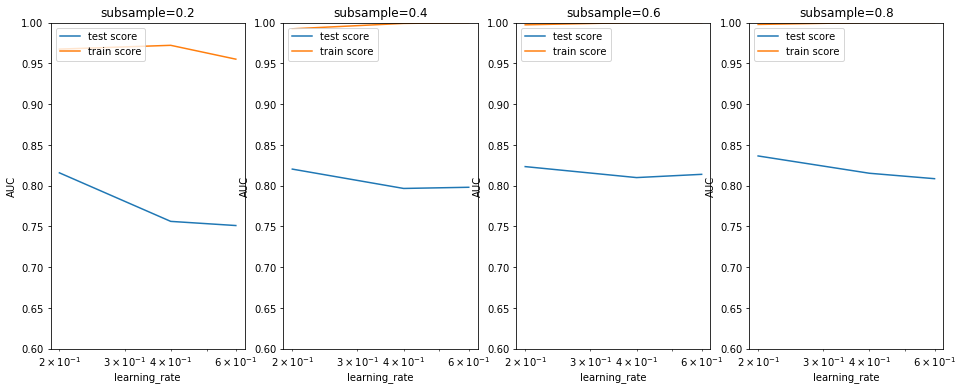

In [39]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.4, 0.6], 
             'subsample': [0.2, 0.4, 0.6, 0.8]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

From above figure, we find out that the first plot with subsample = 0.3, is the best among the three, as unlike others it does not overfit the trainnig data at learning rate of 0.2.

So we shall take, the subsample = 0.3, and the learning_rate as 0.2, and build our model

In [40]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

# Lets choose the best params,
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.4,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.4},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [41]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# confusion matrix on test data
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       150
           1       0.63      0.58      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

[[122  28]
 [ 34  47]]


So we are getting a better accuracy from our xgboost model (model), than our randomforestclassifier (forest1), accuracy being 73.16%

Lets also check the roc - auc

In [42]:
# predict the prob. rather than label, since we want to compute roc auc.
y_pred = model.predict_proba(X_test)

# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.782798353909465

We observe that our XGBoost model and RandomForestClassifier performance are not much different. Its just that the accuracy in xgboost has slightly increased.